<a href="https://colab.research.google.com/github/klisard/ML/blob/main/In_Class_Assignment_Klisard_Muca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the important libraries
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

In [ ]:
#we load the dataset

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

In [ ]:
#train set and test set sply
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# display(X_train.head(100))

In [ ]:
#now we train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make predictions
y_pred = lr.predict(X_test)
print(y_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [ ]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "error": y_test.values - y_pred
})
print(comparison.head)

<bound method NDFrame.head of        Actual  Predicted     error
0     0.47700   0.719123 -0.242123
1     0.45800   1.764017 -1.306017
2     5.00001   2.709659  2.290351
3     2.18600   2.838926 -0.652926
4     2.78000   2.604657  0.175343
...       ...        ...       ...
4123  2.63300   1.991746  0.641254
4124  2.66800   2.249839  0.418161
4125  5.00001   4.468770  0.531240
4126  0.72300   1.187511 -0.464511
4127  1.51500   2.009403 -0.494403

[4128 rows x 3 columns]>


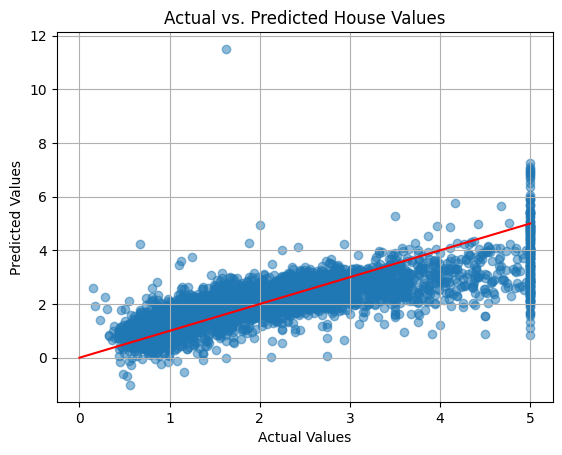

In [ ]:
#we can also plot the comparison
import matplotlib.pyplot as plt
plt.scatter(comparison["Actual"], comparison["Predicted"], alpha=0.5)
plt.plot([0, 5], [0, 5], color='red')  # Ideal line (perfect predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Values")
plt.grid(True)
plt.show()


In [ ]:
# evaluate model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 0.5558915986952444
R² Score: 0.5757877060324508


In [ ]:
# view feature coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


-----------------
Lasso

In [ ]:
# we initailize Lasso with a moderate alpha value
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# predict on test set
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Evaluate the model
print("Lasso Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Mean Squared Error (MSE): 0.6135115198058131
Lasso R² Score: 0.5318167610318159


In [ ]:
# let's view coefficients (lasso)
coeff_lasso = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Coefficient": lasso.coef_
})
print("\nLasso Feature Coefficients:")
print(coeff_lasso)



Lasso Feature Coefficients:
      Feature  Lasso Coefficient
0      MedInc           0.392693
1    HouseAge           0.015081
2    AveRooms          -0.000000
3   AveBedrms           0.000000
4  Population           0.000016
5    AveOccup          -0.003149
6    Latitude          -0.114291
7   Longitude          -0.099308


---------
Ridge

In [ ]:
# we train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# predict
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# we evaluatee Ridge
print("🔹 Ridge Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

🔹 Ridge Regression:
Mean Squared Error (MSE): 0.5558034669932211
R² Score: 0.5758549611440126


In [ ]:
# let's view coefficients (Ridge)
coeff_ridge = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coefficient": ridge.coef_
})
print("\nRidge Feature Coefficients:")
print(coeff_ridge)


Ridge Feature Coefficients:
      Feature  Ridge Coefficient
0      MedInc           0.448511
1    HouseAge           0.009726
2    AveRooms          -0.123014
3   AveBedrms           0.781417
4  Population          -0.000002
5    AveOccup          -0.003526
6    Latitude          -0.419787
7   Longitude          -0.433681


-----
Answers
----

Report the following for each model:
Mean Squared Error (MSE)
R² Score
Table of feature coefficients


In [ ]:
# MSE R2 Linear regression
print("🔹 Linear Regression:")
print("Linear Regression Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Linear Regression R² Score:", r2_score(y_test, y_pred))

# MSE R2 LASSO
print("🔹 Lasso Regression:")
print("Lasso Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R² Score:", r2_score(y_test, y_pred_lasso))

# we evaluatee Ridge
print("🔹 Ridge Regression:")
print("Ridge Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R² Score:", r2_score(y_test, y_pred_ridge))


🔹 Linear Regression:
Linear Regression Mean Squared Error (MSE): 0.5558915986952444
Linear Regression R² Score: 0.5757877060324508
🔹 Lasso Regression:
Lasso Mean Squared Error (MSE): 0.6135115198058131
Lasso R² Score: 0.5318167610318159
🔹 Ridge Regression:
Ridge Mean Squared Error (MSE): 0.5558034669932211
Ridge R² Score: 0.5758549611440126


In [ ]:
#Table of feature coefficients
coef_df = pd.DataFrame({
    'Feature': california.feature_names,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
print(coef_df)


      Feature    Linear     Ridge     Lasso
0      MedInc  0.448675  0.448511  0.392693
1    HouseAge  0.009724  0.009726  0.015081
2    AveRooms -0.123323 -0.123014 -0.000000
3   AveBedrms  0.783145  0.781417  0.000000
4  Population -0.000002 -0.000002  0.000016
5    AveOccup -0.003526 -0.003526 -0.003149
6    Latitude -0.419792 -0.419787 -0.114291
7   Longitude -0.433708 -0.433681 -0.099308


Compare models
–	Which model performed best? Why?
–	Which features were removed by Lasso? Why do you think that happened?
–	How did Ridge change the coefficients compared to Linear Regression?


- Ridge performs better due to regulations and because tis r2 is bigger
- AveRooms, AveBedrms were removed. Lasso drops less important, correlated features to simplify the model.
- Ridge shrunk all coefficents but kept them all. it reduced their size witohut removing any features.


Plot the coefficients - Bar chart comparing all three models coefficients for each feature

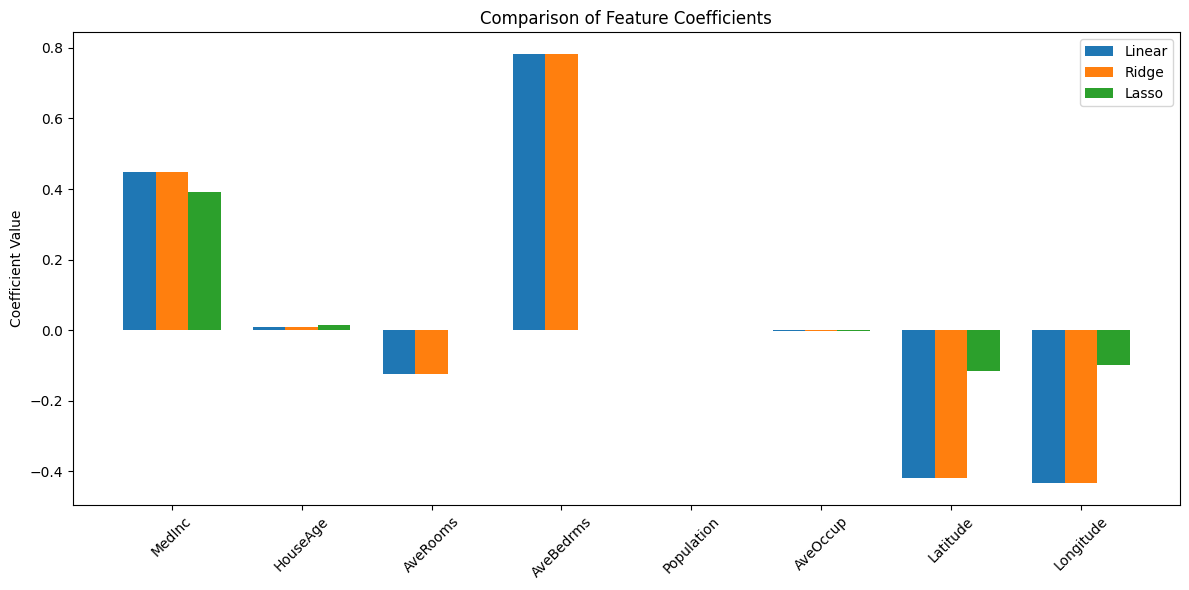

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(california.feature_names))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, lr.coef_, width, label='Linear')
plt.bar(x, ridge.coef_, width, label='Ridge')
plt.bar(x + width, lasso.coef_, width, label='Lasso')
plt.xticks(ticks=x, labels=california.feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Comparison of Feature Coefficients")
plt.legend()
plt.tight_layout()
plt.show()


Reflection questions (short written answers):
–	What’s the trade-off between model simplicity and accuracy?
–	In what situations would you choose Lasso over Ridge or vice versa?
–	How could this apply to real-world problems (e.g., real estate, medical data)?


- simpler models are easier to interpret but lose accuaracy, more complex models may fit better but risk overfitting.
-i would use lasso when i want features selection and ridge when all features matter but i want to prevent overfitting.
-lasso can highlight key predictors like location, age ... while ridge ensures stable predictions using all data.